Import Library

In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import joblib

Load Data and Read 5 first Data

In [68]:
df = pd.read_csv("./mental_health_social_media_dataset.csv")

df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


Check Missing Values

In [69]:
df.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

Check Data Type of Columns

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

Check Statistik Data

In [71]:
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


View the number of data and columns

In [72]:
print(f"Total Data : {df.shape[0]}")
print(f"Total Column : {df.shape[1]}")

Total Data : 5000
Total Column : 15


Check Duplicated Data

In [73]:
print(f"Total Duplicated Data : {df.duplicated().sum()}")

Total Duplicated Data : 0


Delete unused columns

In [74]:
df = df.drop(columns="person_name", axis=1)

In [75]:
# Remove gender Others
df = df[df["gender"].isin(["Male", "Female"])]

Rename Columns

In [76]:
df = df.rename(columns={
    "daily_screen_time_min": "daily_screen_time",
    "social_media_time_min": "social_media_time",
    "negative_interactions_count": "negative_interactions",
    "positive_interactions_count": "positive_interactions",
    "physical_activity_min": "physical_activity"
})

Split column into Numerical and Categorical

In [77]:
numerical = df.select_dtypes(include="number").columns
categorical = df.select_dtypes(include="object").columns

print(f"Total numerical features : {len(numerical)}")
print(f"Total categorical features : {len(categorical)}")

Total numerical features : 10
Total categorical features : 4


Univariate Analysis

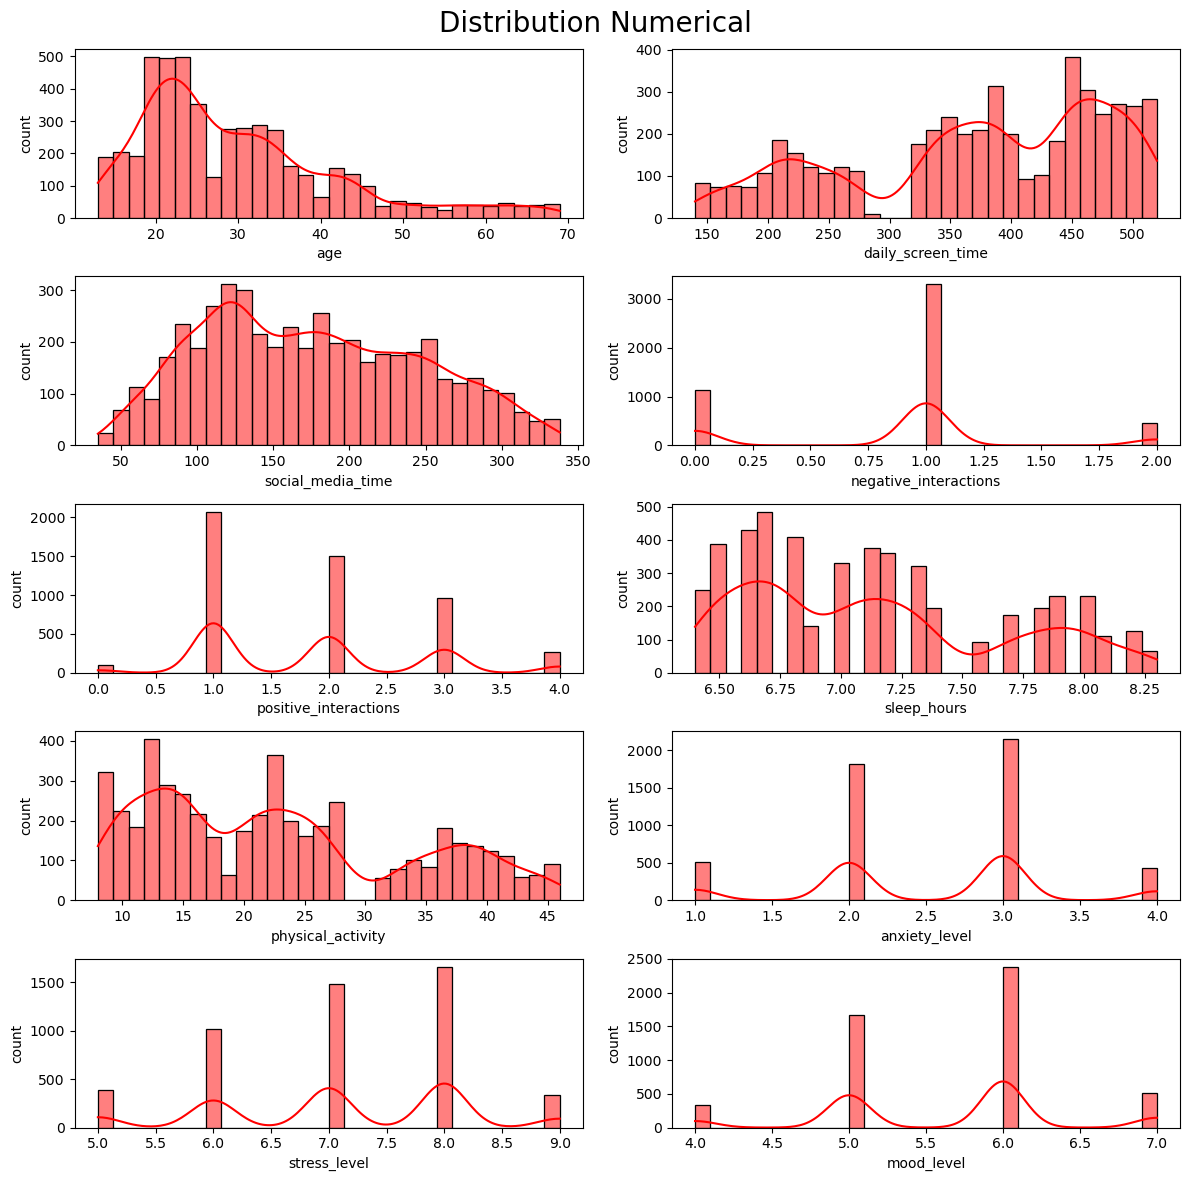

In [78]:
plt.figure(figsize=(12,12))
plt.suptitle("Distribution Numerical", fontsize=20)
for index, data in enumerate(numerical):
    ax = plt.subplot(5, 2, index+1)
    sns.histplot(df[data], bins=30, ax=ax, kde=True, color="red")
    plt.xlabel(data)
    plt.ylabel("count")
plt.tight_layout()
plt.show()

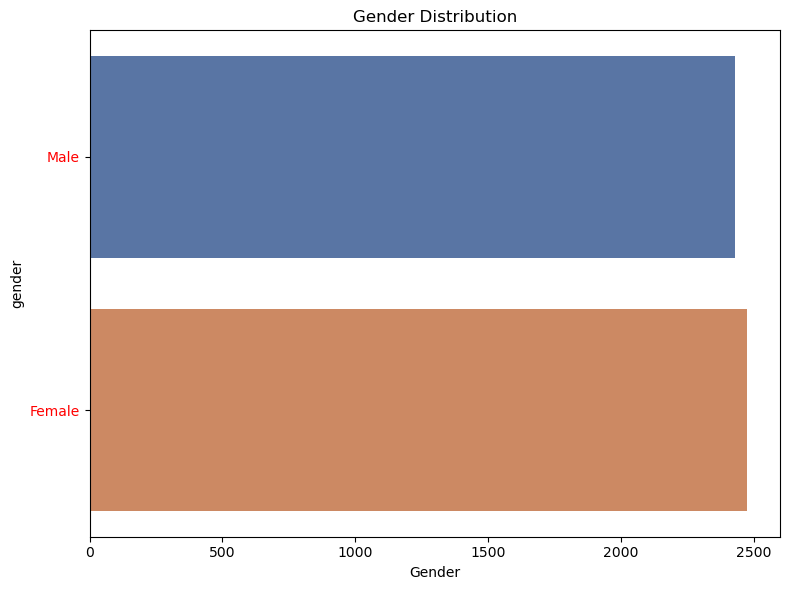

In [79]:
plt.figure(figsize=(8,6))
plt.title("Gender Distribution")
sns.countplot(data=df, y="gender", palette="deep", hue="gender")
plt.xlabel("Gender")
plt.yticks(color="red")
plt.tight_layout()
plt.show()

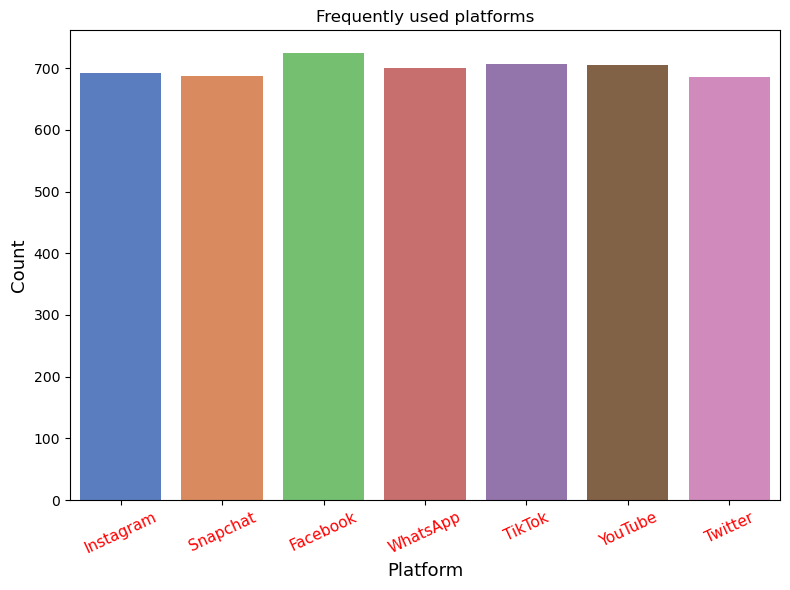

In [80]:
plt.figure(figsize=(8,6))
plt.title("Frequently used platforms")
sns.countplot(data=df, x="platform", palette="muted", hue="platform")
plt.xlabel("Platform", fontsize=13)
plt.xticks(rotation=25, fontsize=11, color="red")
plt.ylabel("Count", fontsize=13)
plt.tight_layout()
plt.show()

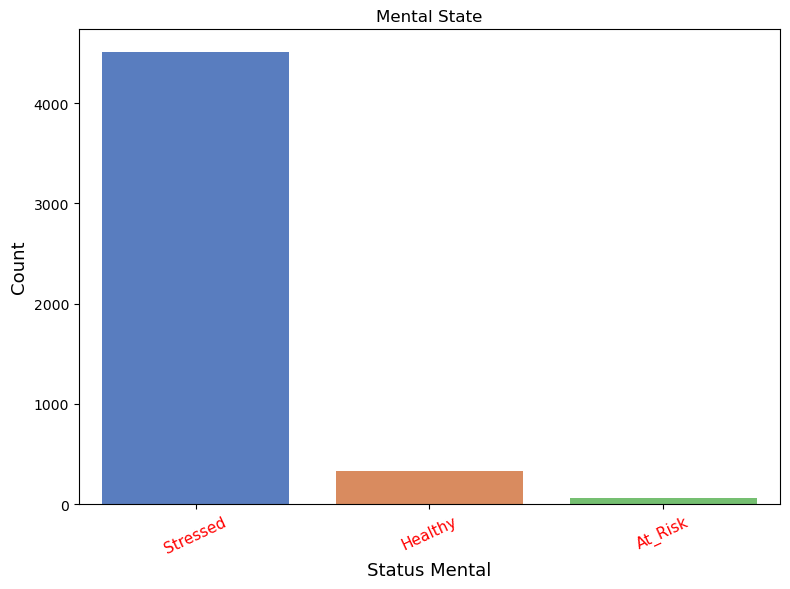

In [81]:
# IMBALANCED DATA
plt.figure(figsize=(8,6))
plt.title("Mental State")
sns.countplot(data=df, x="mental_state", palette="muted", hue="mental_state")
plt.xlabel("Status Mental", fontsize=13)
plt.xticks(rotation=25, fontsize=11, color="red")
plt.ylabel("Count", fontsize=13)
plt.tight_layout()
plt.show()

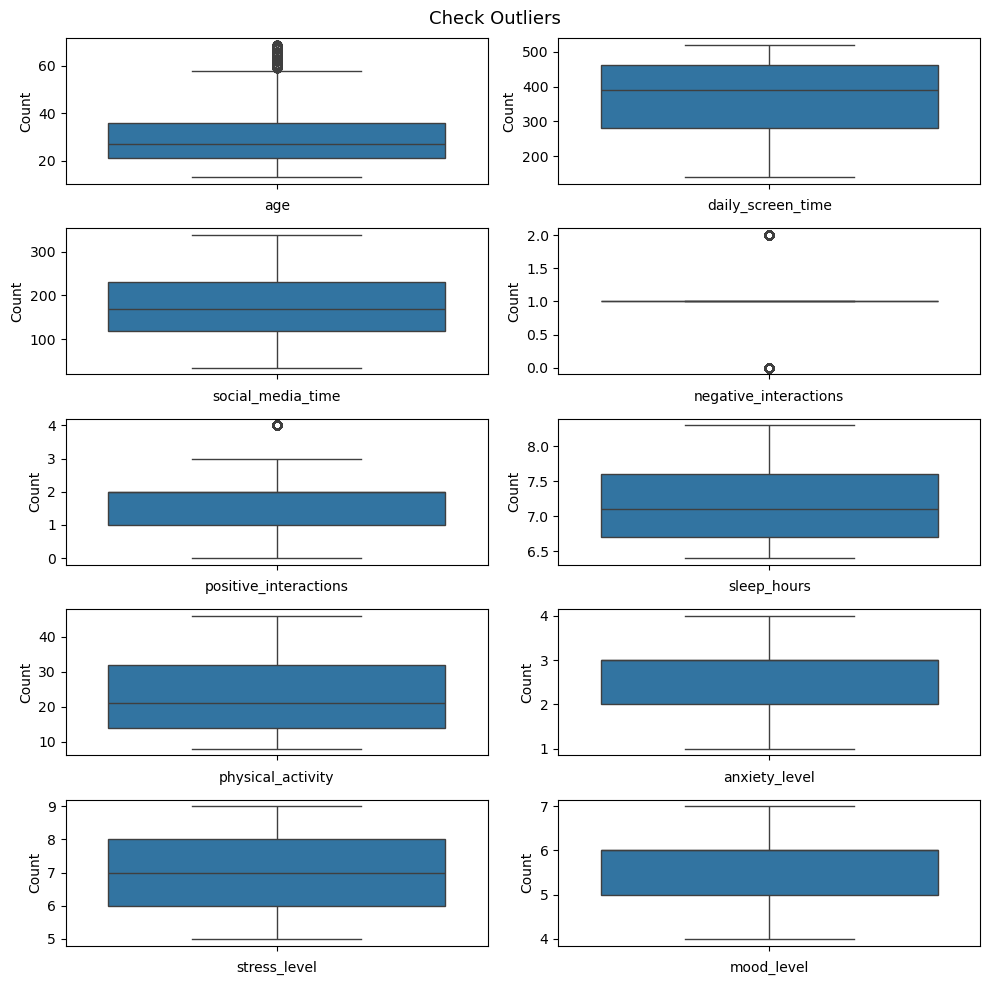

In [82]:
plt.figure(figsize=(10,10))
plt.suptitle("Check Outliers", fontsize=13)
for index, data in enumerate(numerical):
    plt.subplot(5, 2, index+1)
    sns.boxplot(df[data])
    plt.xlabel(data)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

Bivariate Analysis

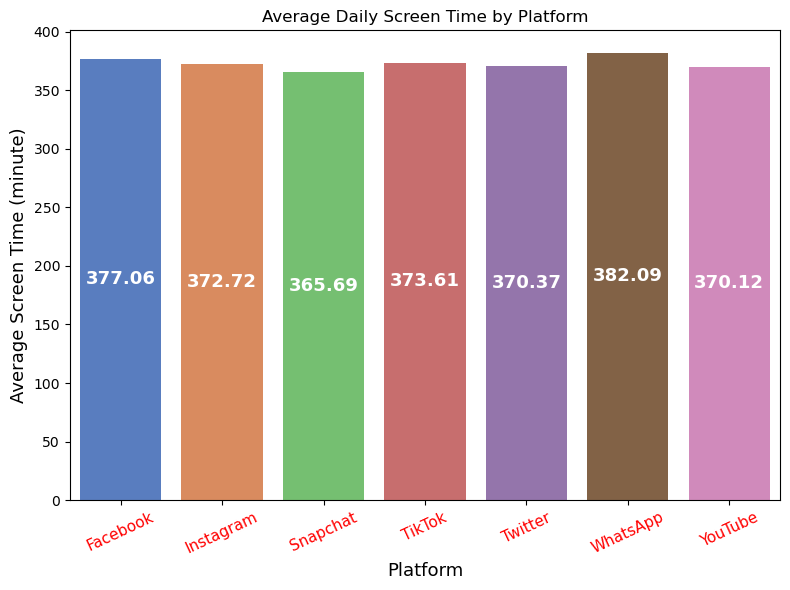

In [83]:
platform_screen_time = df.groupby("platform")["daily_screen_time"].mean().round(2)

plt.figure(figsize=(8,6))
plt.title("Average Daily Screen Time by Platform")
ax = sns.barplot(x=platform_screen_time.index, 
    y=platform_screen_time.values, 
    palette="muted", 
    hue=platform_screen_time.index
)
for i in ax.containers:
    ax.bar_label(
        i, 
        fontsize=13, 
        color="white", 
        label_type="center", 
        fontweight="bold"
    )
plt.xlabel("Platform", fontsize=13)
plt.xticks(rotation=25, fontsize=11, color="red")
plt.ylabel("Average Screen Time (minute)", fontsize=13)
plt.tight_layout()
plt.show()

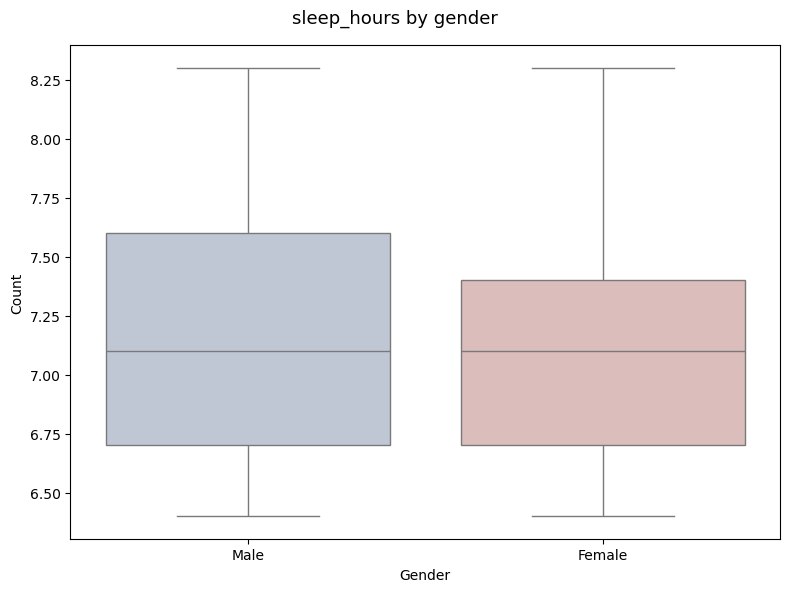

In [84]:
plt.figure(figsize=(8,6))
plt.suptitle("sleep_hours by gender", fontsize=13)
sns.boxplot(data=df, x="gender", y="sleep_hours", hue="gender", palette="vlag")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

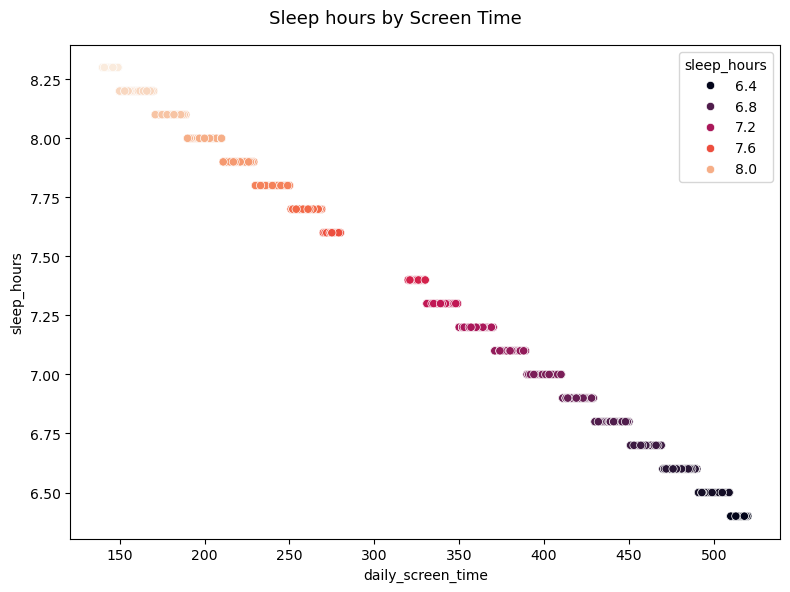

In [85]:
plt.figure(figsize=(8,6))
plt.suptitle("Sleep hours by Screen Time", fontsize=13)
sns.scatterplot(
    data=df, 
    x="daily_screen_time", 
    y="sleep_hours", hue="sleep_hours", 
    palette="rocket"
)
plt.xlabel("daily_screen_time")
plt.ylabel("sleep_hours")
plt.tight_layout()
plt.show()

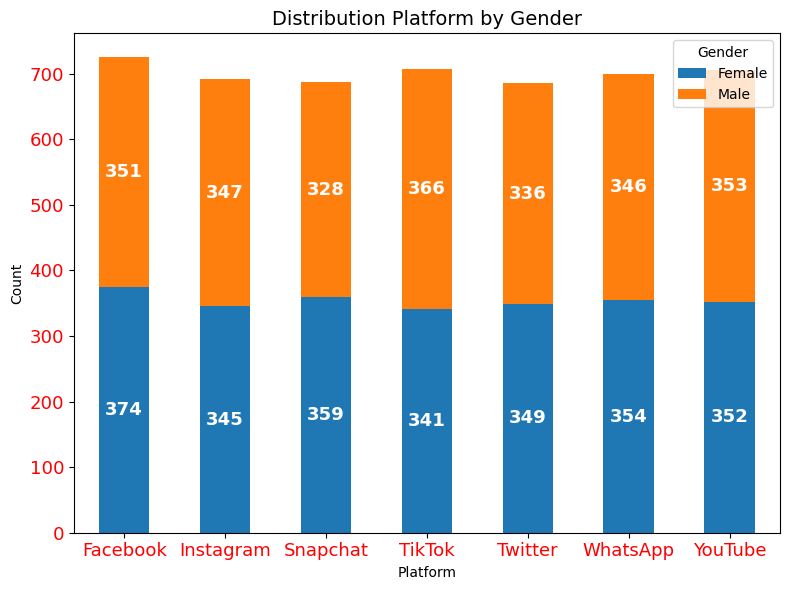

In [86]:
crosstab = pd.crosstab(df["platform"], df["gender"])
ax = crosstab.plot(kind="bar", stacked=True, figsize=(8,6))
for i in ax.containers:
    ax.bar_label(
        i, 
        fontsize=13, 
        color="white", 
        label_type="center", 
        fontweight="bold"
    )
plt.title('Distribution Platform by Gender', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=0, fontsize=13, color="red")
plt.yticks(rotation=0, fontsize=13, color="red")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Multivariate Analysis

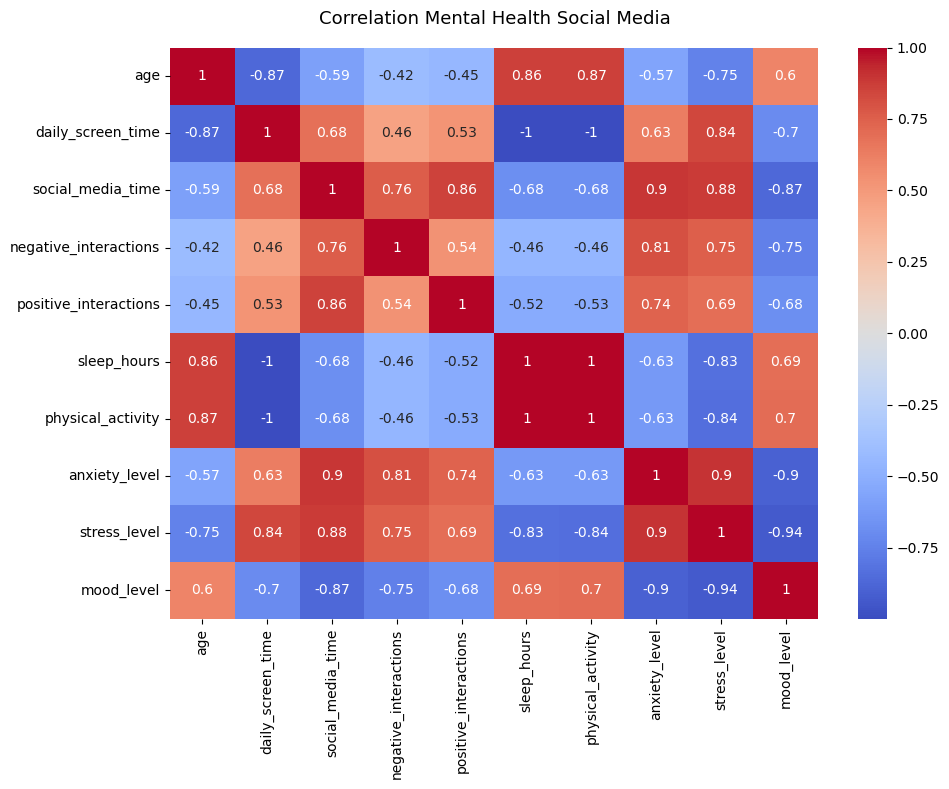

In [87]:
plt.figure(figsize=(10,8))
plt.suptitle("Correlation Mental Health Social Media", fontsize=13)
sns.heatmap(data=df[numerical].corr(), cmap="coolwarm", annot=True, fmt=".2g")
plt.tight_layout()
plt.show()

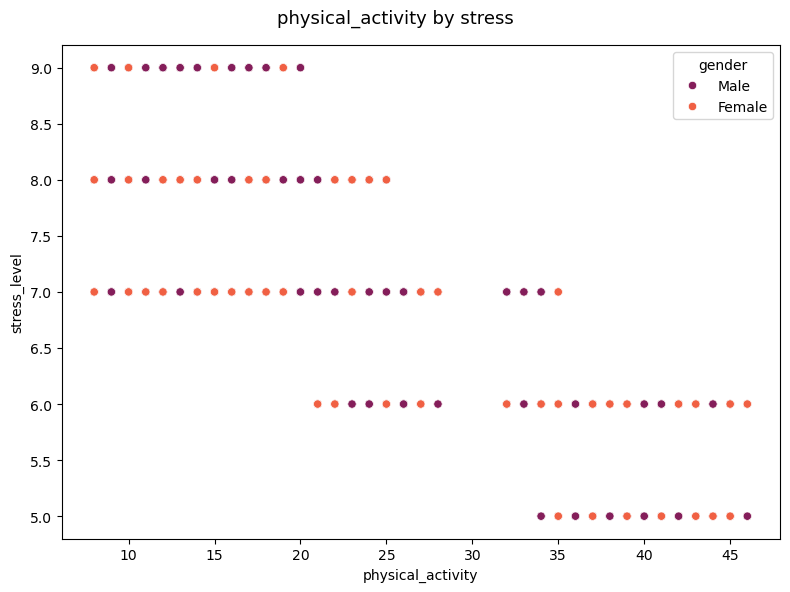

In [88]:
plt.figure(figsize=(8,6))
plt.suptitle("physical_activity by stress", fontsize=13)
sns.scatterplot(
    data=df, 
    x="physical_activity", 
    y="stress_level", 
    hue="gender", 
    palette="rocket"
)
plt.xlabel("physical_activity")
plt.ylabel("stress_level")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

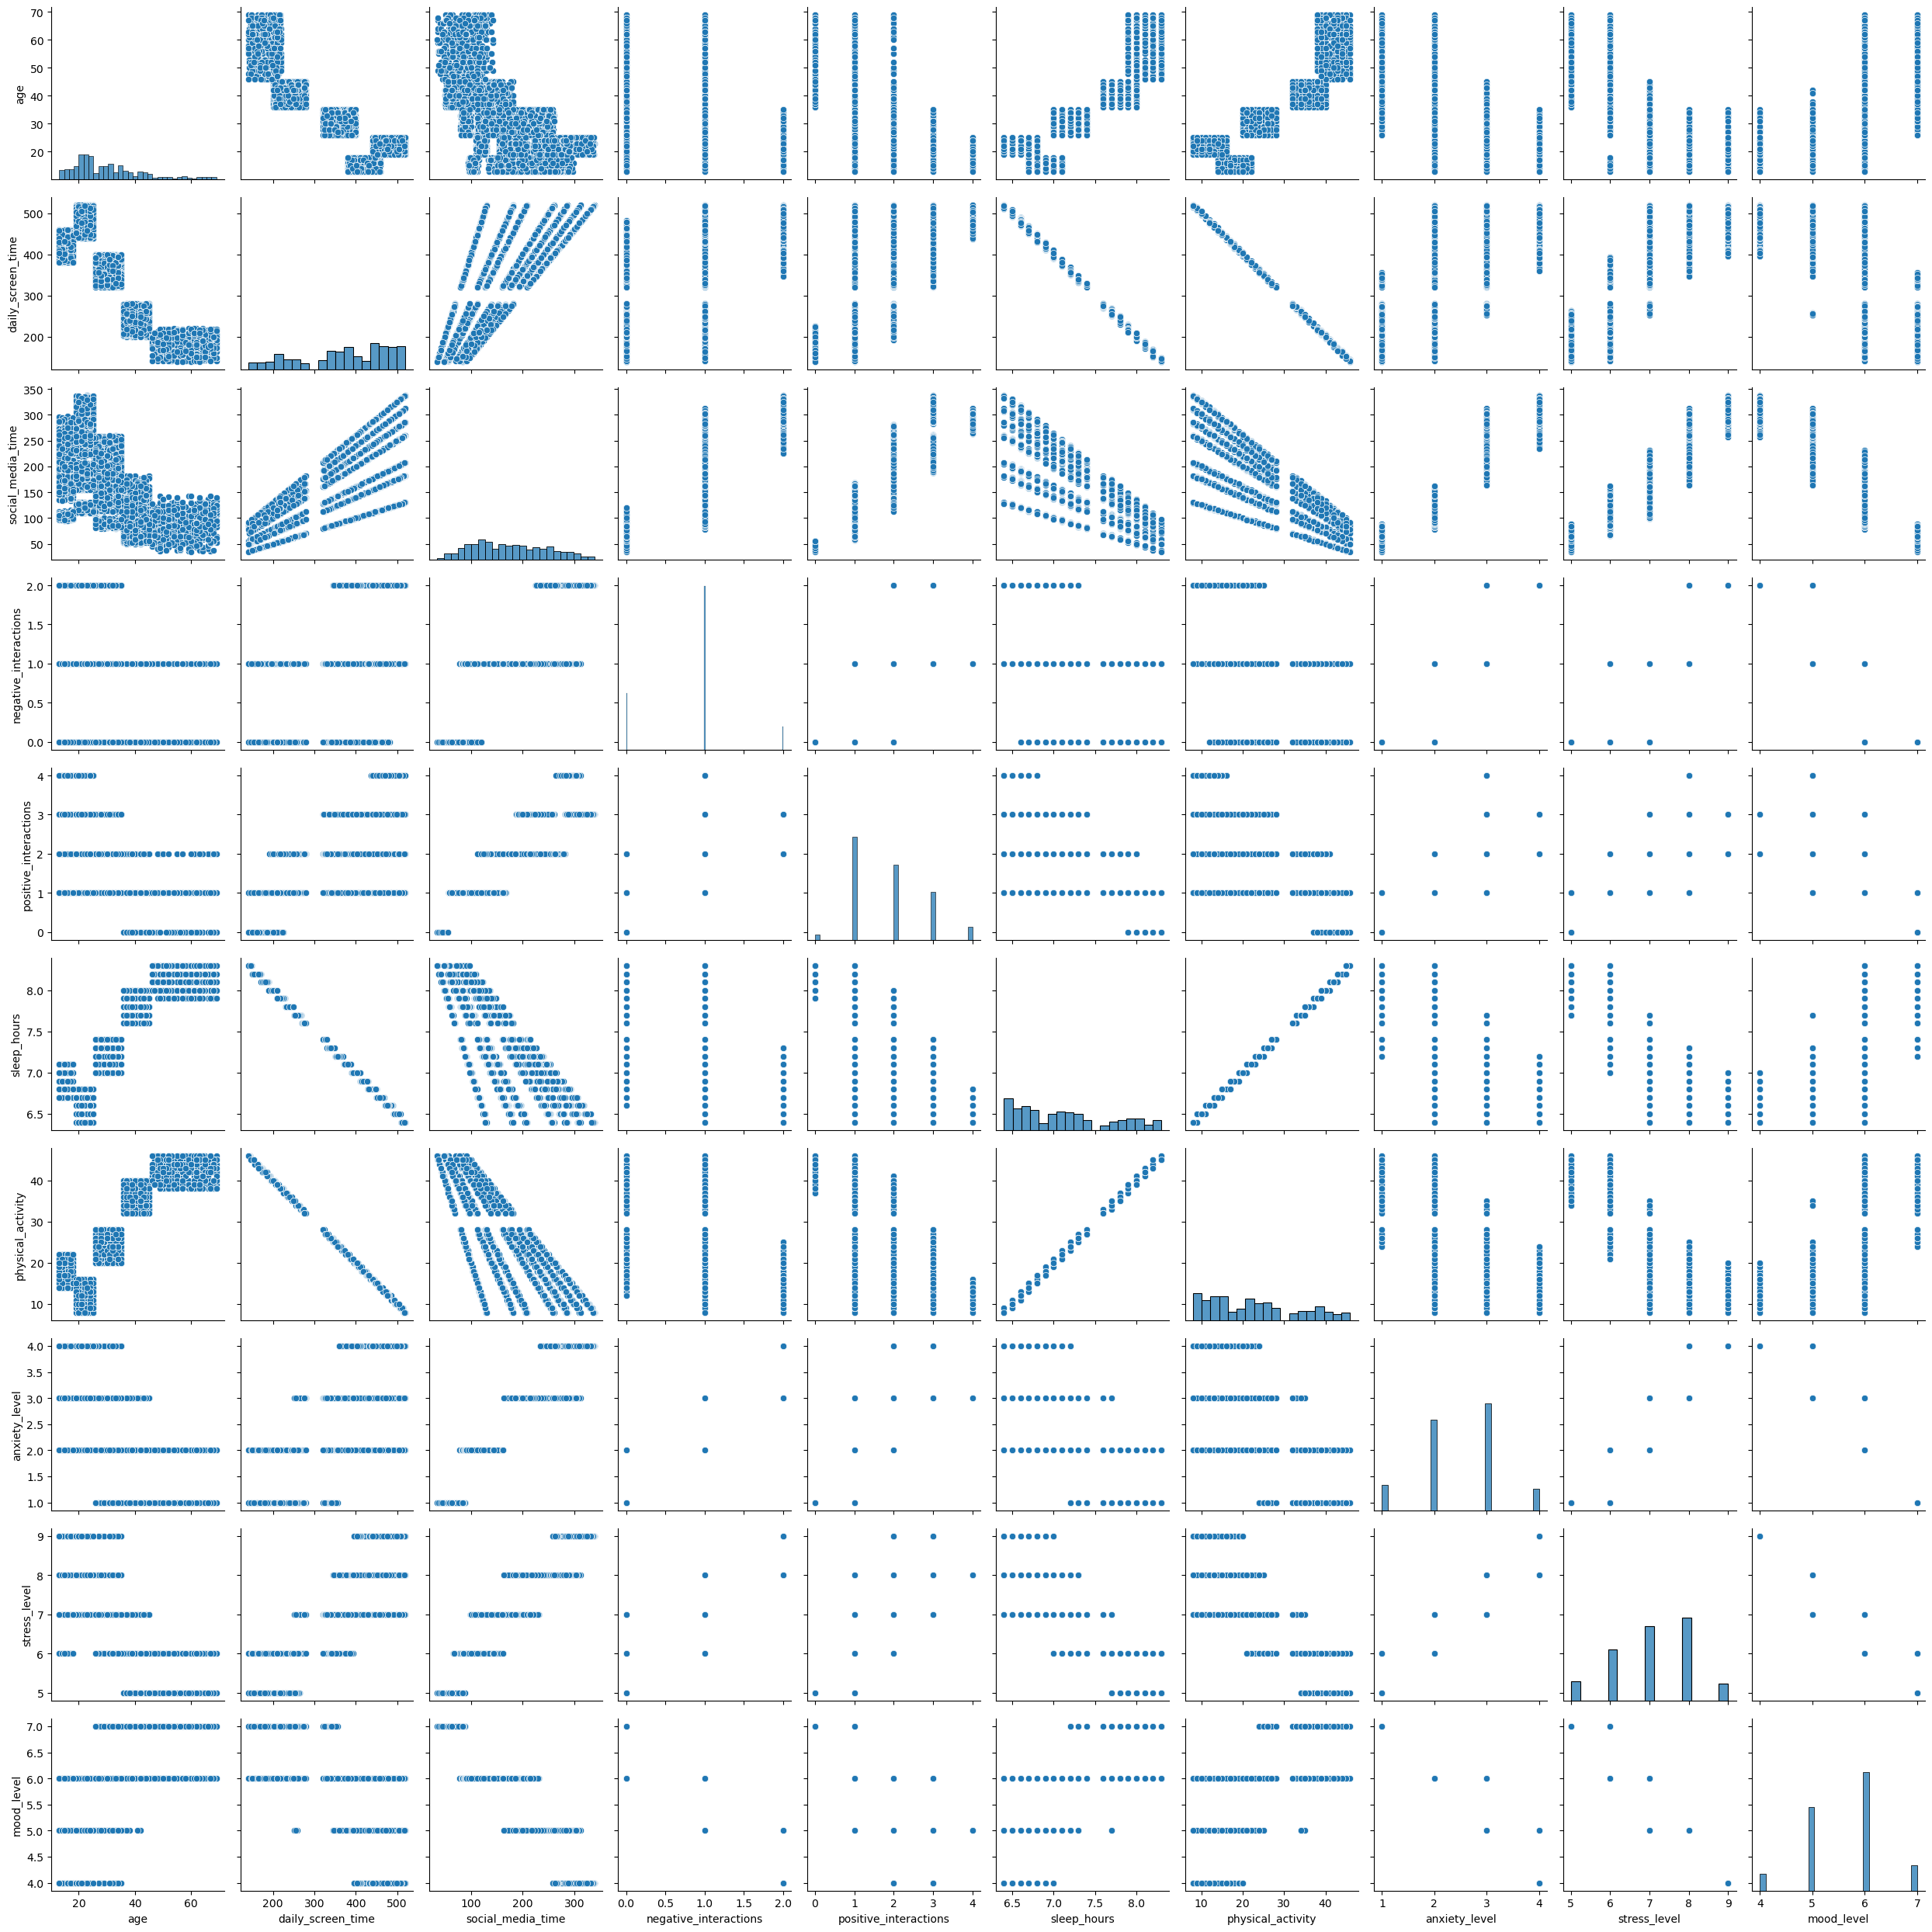

In [89]:
plt.figure(figsize=(10,8))
sns.pairplot(df[numerical])
plt.xlabel(data)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Drop column which has Multicollinearity

In [90]:
df = df.drop(columns=["mood_level", "social_media_time", "anxiety_level"], axis=1)

Split date column into day, month, and year

In [91]:
date_df = pd.DataFrame(
    {
        "day": pd.to_datetime(df["date"], errors="coerce").dt.day,
        "month": pd.to_datetime(df["date"], errors="coerce").dt.month,
        "year": pd.to_datetime(df["date"], errors="coerce").dt.year
    }
)

df = pd.concat([df.drop(columns="date"), date_df], axis=1)

Split data into train and test

In [92]:
X = df.drop(columns="sleep_hours")
y = df["sleep_hours"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

print(f"Total Train Data : {len(X_train)}")
print(f"Total Test Data : {len(X_test)}")

Total Train Data : 3430
Total Test Data : 1471


Encode Categorical Features

In [93]:
cols = ["gender", "platform", "mental_state"]
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_train_encode = pd.DataFrame(
    data=ohe.fit_transform(X_train[cols]),
    columns=ohe.get_feature_names_out(cols),
    index=X_train.index
)

X_test_encode = pd.DataFrame(
    data=ohe.transform(X_test[cols]),
    columns=ohe.get_feature_names_out(cols),
    index=X_test.index
)

X_train = pd.concat([X_train.drop(columns=cols), X_train_encode], axis=1)
X_test = pd.concat([X_test.drop(columns=cols), X_test_encode], axis=1)

Feature Scaling

In [94]:
scaling = StandardScaler()
X_train_scaling = scaling.fit_transform(X_train)
X_test_scaling = scaling.fit_transform(X_test)

SVR Default

In [95]:
svr_default = SVR()
svr_default.fit(X_train_scaling, y_train)

print(f"Train Score with default SVR : {svr_default.score(X_train_scaling, y_train):0.4f}")

Train Score with default SVR : 0.9914


Hyperparameter Tunning

In [96]:
param_grid = {
    "kernel" : ["rbf", "linear", "poly"],
    "epsilon" : [0.1, 0.3, 0.5],
    "degree" : [3,4,5],
    "gamma": ['scale', 'auto'],
    "C" : [1,5,10]
}

grid = GridSearchCV(svr_default, param_grid, cv=5)
grid.fit(X_train_scaling, y_train)

best_params = grid.best_params_ 

svr_best_params = SVR(**best_params)
svr_best_params.fit(X_train_scaling, y_train)

y_pred_best_params = svr_best_params.predict(X_test_scaling)

print(f"Best Params : {best_params}")
print(f"Train Score with best params: {svr_default.score(X_train_scaling, y_train):0.4f}")

Best Params : {'C': 1, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Train Score with best params: 0.9914


Evaluation Model

In [97]:
mse = mean_squared_error(y_test, y_pred_best_params)
mae = mean_absolute_error(y_test, y_pred_best_params)
r2_score = r2_score(y_test, y_pred_best_params)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R2_SCORE : {r2_score}")

MSE : 0.0020019298417073427
MAE : 0.03651510176997187
RMSE : 0.04474293063387045
R2_SCORE : 0.9929553705960761


Save model

In [98]:
joblib.dump(svr_best_params, "svr_model.pkl")

['svr_model.pkl']